In [ ]:
#Varying the Classification Threshold in Logistic Regression

[0.35647133 0.9248954  0.84001454 0.1081367  0.0959529  0.28999747
 0.49652476 0.15788981 0.16230248 0.45185724 0.7133237  0.68898623
 0.20198601 0.10653115 0.27004769 0.31213985 0.09884355 0.75454648
 0.45498122 0.09026726 0.84654938 0.79535385 0.42324226 0.4140509
 0.11819027 0.22630818 0.55494996 0.13308609 0.53547562 0.35949217
 0.88350861 0.08236977 0.16394933 0.48035599 0.60093832 0.45491619
 0.49004761 0.77844735 0.48922526 0.95008993 0.94650602 0.09884355
 0.09306031 0.34793407 0.11820524 0.76089577 0.29277774 0.29696583
 0.11818923 0.90958282 0.20941418 0.34821535 0.32555548 0.48036688
 0.54377636 0.29694078 0.11139599 0.63251857 0.74216142 0.08756304
 0.08236884 0.37602972 0.29692409 0.12170563 0.60893044 0.58769055
 0.68782475 0.17181091 0.10185945 0.94037534 0.94128462 0.11645385
 0.61198171 0.94136015 0.20232556 0.09027875 0.93970042 0.22642022
 0.81108702 0.19689621 0.23840929 0.11139813 0.53040915 0.94989275
 0.10495666 0.11140232 0.26578409 0.07745837 0.17630059 0.12903

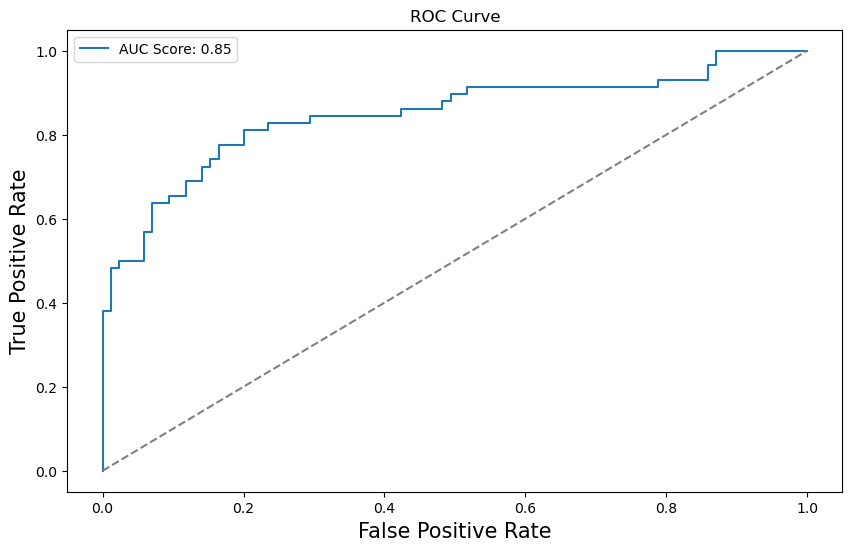

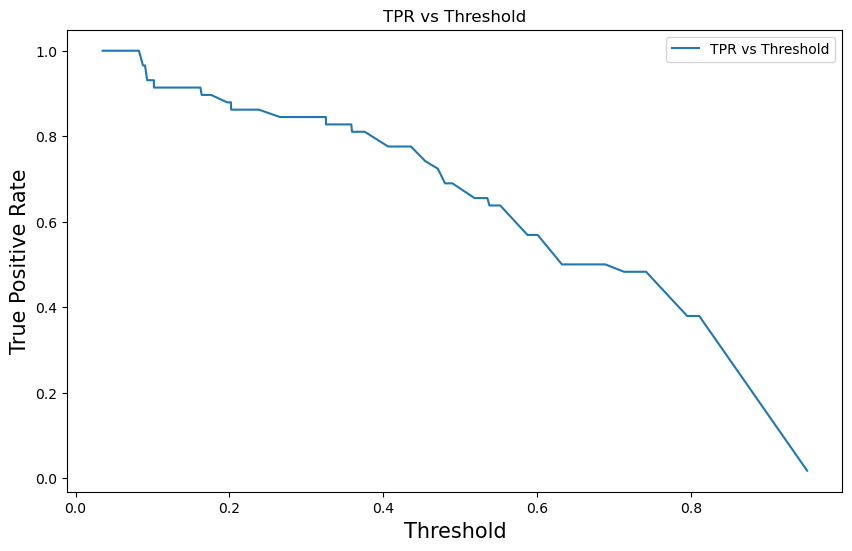

Confusion Matrix at Threshold 0.146:
[[53  5]
 [46 39]]


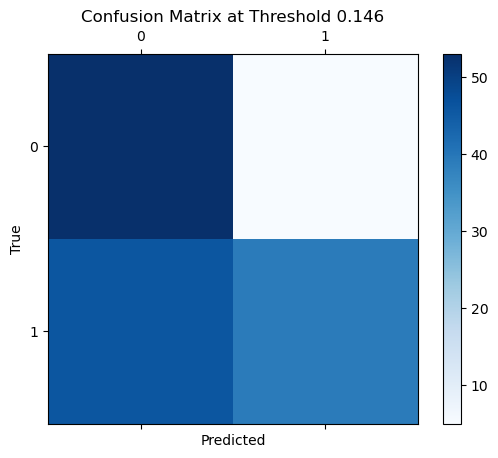

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Drop rows with missing values
titanic.dropna(subset=['age', 'fare', 'sex', 'class'], inplace=True)

# Convert categorical data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['class'] = titanic['class'].map({'Third': 3, 'Second': 2, 'First': 1})

# Define features and target
X = titanic[['age', 'fare', 'sex', 'class']]
y = titanic['survived']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Initialize and fit the Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Display prediction probabilities for the positive class
print(y_pred_proba)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC Score: {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot TPR vs Thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label="TPR vs Threshold")
plt.xlabel('Threshold', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('TPR vs Threshold')
plt.legend(loc='best')
plt.show()

# Binarize predictions at threshold 0.146
y_pred_th = binarize(y_pred_proba.reshape(-1, 1), threshold=0.146)
conf_matrix_th = confusion_matrix(y_test, y_pred_th[:, 0], labels=[1, 0])
print('Confusion Matrix at Threshold 0.146:')
print(conf_matrix_th)

# Plot confusion matrix at threshold 0.146
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix_th, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix at Threshold 0.146')
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [10]:
y_pred_proba = lr.predict_proba(X_test)

In [12]:
y_pred_proba

array([[0.64352867, 0.35647133],
       [0.0751046 , 0.9248954 ],
       [0.15998546, 0.84001454],
       [0.8918633 , 0.1081367 ],
       [0.9040471 , 0.0959529 ],
       [0.71000253, 0.28999747],
       [0.50347524, 0.49652476],
       [0.84211019, 0.15788981],
       [0.83769752, 0.16230248],
       [0.54814276, 0.45185724],
       [0.2866763 , 0.7133237 ],
       [0.31101377, 0.68898623],
       [0.79801399, 0.20198601],
       [0.89346885, 0.10653115],
       [0.72995231, 0.27004769],
       [0.68786015, 0.31213985],
       [0.90115645, 0.09884355],
       [0.24545352, 0.75454648],
       [0.54501878, 0.45498122],
       [0.90973274, 0.09026726],
       [0.15345062, 0.84654938],
       [0.20464615, 0.79535385],
       [0.57675774, 0.42324226],
       [0.5859491 , 0.4140509 ],
       [0.88180973, 0.11819027],
       [0.77369182, 0.22630818],
       [0.44505004, 0.55494996],
       [0.86691391, 0.13308609],
       [0.46452438, 0.53547562],
       [0.64050783, 0.35949217],
       [0.

<Axes: >

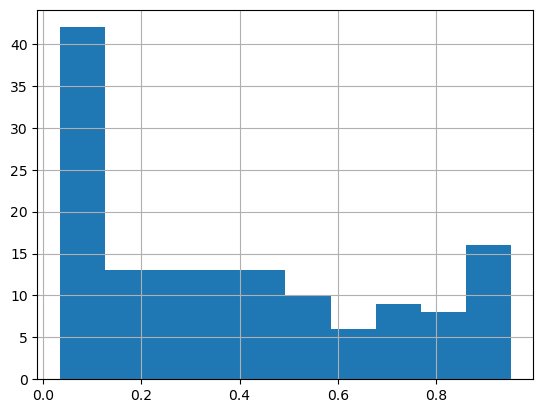

In [14]:
%matplotlib inline
pd.Series(y_pred_proba[:,1]).hist()

   pregnancy_x  plasma_con  blood_pressure  skin_mm  insulin   bmi  \
0            6         148              72       35        0  33.6   
1            1          85              66       29        0  26.6   
2            8         183              64        0        0  23.3   
3            1          89              66       23       94  28.1   
4            0         137              40       35      168  43.1   

   pedigree_func  age  target  
0          0.627   50       1  
1          0.351   31       0  
2          0.672   32       1  
3          0.167   21       0  
4          2.288   33       1  


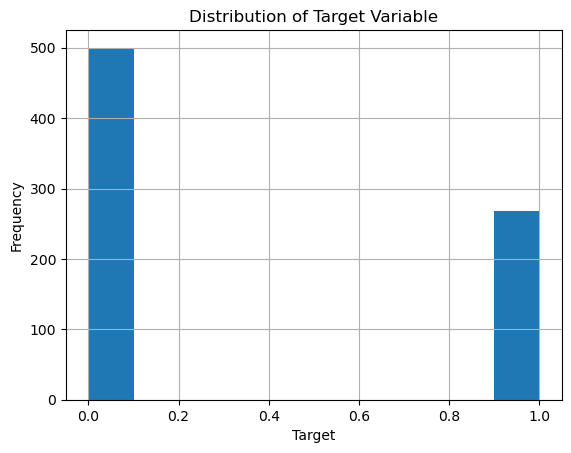

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from an alternative URL
data_web_address = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancy_x', 'plasma_con', 'blood_pressure', 'skin_mm', 'insulin', 'bmi', 'pedigree_func', 'age', 'target']
all_data = pd.read_csv(data_web_address, names=column_names)

# Display the first few rows of the dataset to ensure it is loaded correctly
print(all_data.head())

# Plot the histogram of the target variable
all_data['target'].hist()
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()


In [20]:
from sklearn.preprocessing import binarize

y_pred_default = binarize(y_pred_proba, threshold=0.5)
y_pred_default

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [22]:
y_pred_default[:,1]

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0.])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_default[:,1],labels = [1,0])

array([[38, 20],
       [10, 75]])

In [26]:
y_pred_low = binarize(y_pred_proba, threshold=0.2)
confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0]) #positive class is 1 again

array([[51,  7],
       [41, 44]])

In [28]:
from __future__ import division 
def npv_func(th):
    y_pred_low = binarize(y_pred_proba, threshold=th)

    second_column = confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0])[:,1]
    npv = second_column[1]/second_column.sum()
    return npv

npv_func(0.2)

0.8627450980392157

/var/folders/dv/3stz4zmn5jn1dhpcpw10k25h0000gp/T/ipykernel_17813/4155907018.py:6: RuntimeWarning: invalid value encountered in scalar divide
  npv = second_column[1]/second_column.sum()


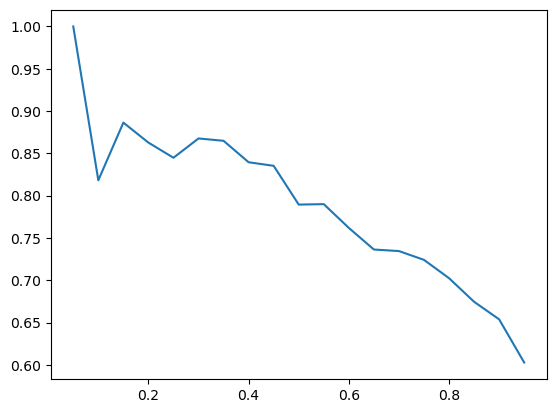

In [30]:
import matplotlib.pyplot as plt
ths = np.arange(0,1,0.05)

npvs = []
for th in np.arange(0,1.00,0.05):
    npvs.append(npv_func(th)) 
    
plt.plot(ths,npvs)